In [14]:
!pip install -q pyomo

In [15]:
!pip install gurobipy

In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv('Lab08_InterestRate.csv')
df

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [18]:
year = np.array(list(df.iloc[:,0]))

In [19]:
rates = np.array(list(df.iloc[:,1]))
rates

array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507,
       0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504,
       0.0478, 0.0549, 0.0468, 0.0478])

In [20]:
ratio = np.array(list(df.iloc[:,2]))
rating = np.array(list(df.iloc[:,3]))
print(ratio)
print(rating)

[0.3615 0.282  0.301  0.3862 0.3578 0.4413 0.6753 0.6777 0.6585 0.6702
 0.3289 0.2473 0.2762 0.3222 0.2792 0.3609 0.6187 0.6176 0.6004 0.6119]
[85.6 91.9 89.1 90.4 86.3 74.7 79.8 74.3 84.4 84.1 86.8 93.7 92.3 94.
 88.9 74.3 74.  69.8 81.6 81. ]


Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (linux64)

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 1 rows, 3 columns and 1 nonzeros
Model fingerprint: 0xd728cddf
Model has 6 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 1e+02]
  QObjective range [9e+00, 3e+05]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1 rows and 0 columns
Presolve time: 0.03s
Presolved: 0 rows, 3 columns, 0 nonzeros
Presolved model has 6 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 2
 AA' NZ     : 1.000e+00
 Factor NZ  : 3.000e+00
 Factor Ops : 5.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.502334

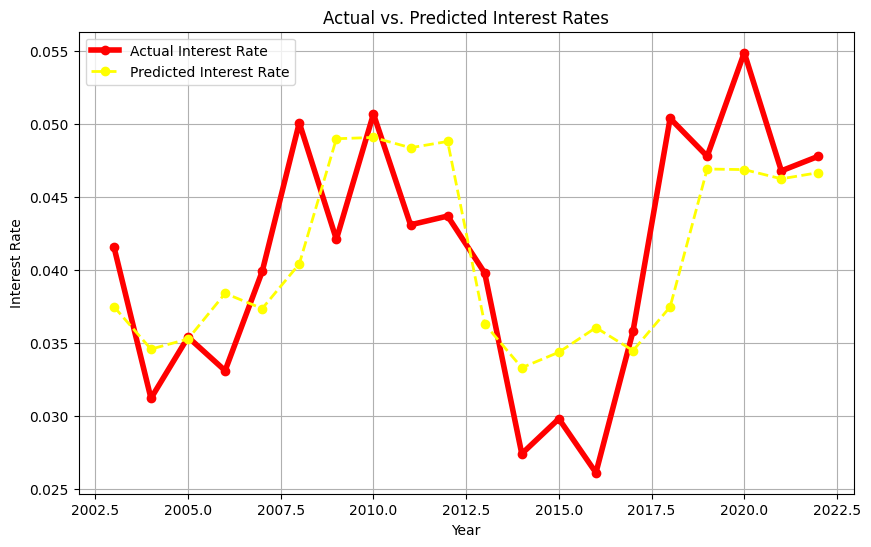

b0 = 0.024231942735984523 b1 = 0.03667959111966047 b2 = 7.541579939107848e-10


In [23]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt

# Create a Gurobi model
model = gp.Model("LinearRegression")

# Define the variables
b0 = model.addVar(lb=0, name="b0")
b1 = model.addVar(name="b1")
b2 = model.addVar(name="b2")

# Set up the objective function to minimize
model.setObjective(gp.quicksum((rates[i] - (b0 + b1 * ratio[i] + b2 * rating[i]))**2 for i in range(len(year))), GRB.MINIMIZE)

# Define the constraint that b0 >= 0
model.addConstr(b0 >= 0, name="b0_constraint")

# Optimize the model
model.optimize()

# Check if the optimization was successful
if model.status == GRB.OPTIMAL:
    # Get the optimized coefficients
    optimized_b0 = b0.x
    optimized_b1 = b1.x
    optimized_b2 = b2.x

    # Calculate the predicted interest rates using the optimized coefficients
    predicted_rates = [optimized_b0 + optimized_b1 * ratio + optimized_b2 * rating for ratio, rating in zip(ratio, rating)]

    # Create a line plot of actual vs. predicted interest rates
    plt.figure(figsize=(10, 6))
    plt.plot(year, rates, label='Actual Interest Rate', marker='o', color='red', linestyle='-', linewidth=4)
    plt.plot(year, predicted_rates, label='Predicted Interest Rate', marker='o', color='yellow', linestyle='--', linewidth=2)
    plt.xlabel('Year')
    plt.ylabel('Interest Rate')
    plt.title('Actual vs. Predicted Interest Rates')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()
else:
    print("Optimization did not converge to an optimal solution.")


print('b0 =' , optimized_b0 ,'b1 =' , optimized_b1,'b2 =' , optimized_b2)